<a href="https://colab.research.google.com/github/avinashkolla532/Calories_Burnt_prediction/blob/main/Calories_Burnt_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

In [93]:

dataset = pd.read_csv('/content/calories.csv')

In [94]:
dataset.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [95]:
dataset1 = pd.read_csv('/content/exercise.csv')

In [96]:
dataset1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [97]:
encoder = LabelEncoder()

In [98]:
calories = pd.concat([dataset1,dataset['Calories']],axis=1)

In [99]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [100]:
calories.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [101]:
calories['Gender'] = encoder.fit_transform(calories['Gender'])

In [102]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [103]:
calories.std()

User_ID       2.872851e+06
Gender        5.000042e-01
Age           1.698026e+01
Height        1.425811e+01
Weight        1.503566e+01
Duration      8.319203e+00
Heart_Rate    9.583328e+00
Body_Temp     7.792299e-01
Calories      6.245698e+01
dtype: float64

In [104]:
calories.info()
calories.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [105]:
sns.set()

In [106]:
correlation = calories.corr()

<Axes: >

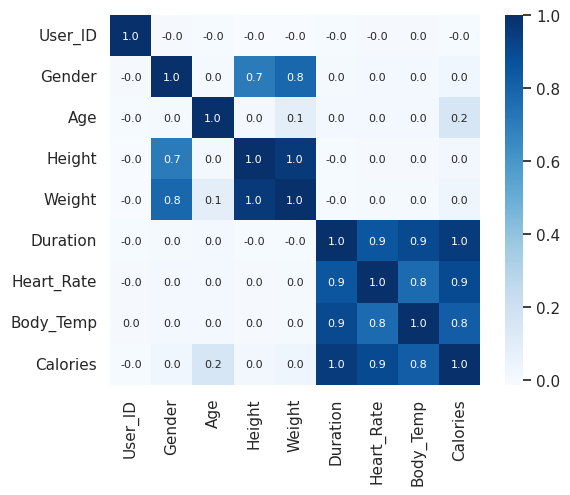

In [107]:
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [109]:
x=calories.drop(columns='Calories',axis=1)
y=calories['Calories']

In [110]:
print(x)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363       1   68   190.0    94.0      29.0       105.0       40.8
1      14861698       0   20   166.0    60.0      14.0        94.0       40.3
2      11179863       1   69   179.0    79.0       5.0        88.0       38.7
3      16180408       0   34   179.0    71.0      13.0       100.0       40.5
4      17771927       0   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082       0   20   193.0    86.0      11.0        92.0       40.4
14996  17212577       0   27   165.0    65.0       6.0        85.0       39.2
14997  17271188       0   43   159.0    58.0      16.0        90.0       40.1
14998  18643037       1   78   193.0    97.0       2.0        84.0       38.3
14999  11751526       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]


In [111]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [113]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 8) (12000, 8) (3000, 8)


In [116]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
prediction_x_train = model.predict(x_train)
accuracy = metrics.r2_score(y_train,prediction_x_train)
accuracy_meanAbsolute = metrics.mean_absolute_error(y_train,prediction_x_train)

In [123]:
print(accuracy)
print(accuracy_meanAbsolute)

0.9995698984059959
0.9471989145452777


In [120]:
prediction_x_test = model.predict(x_test)
accuracy = metrics.r2_score(y_test,prediction_x_test)
accuracy_meanAbsolute = metrics.mean_absolute_error(y_test,prediction_x_test)

In [124]:
print(accuracy)
print(accuracy_meanAbsolute)

0.9995698984059959
0.9471989145452777
